# Assignment 1

All required code is a single line. The length of your response for questions that require identification and/or interpretation will not be considered in evaluation. For example, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. 

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

### Question 1: Simple Linear Regression 

Let's set up our workspace and use the `Boston` dataset in the `ISLP` library. Print `Boston` to learn more about the dataset.

In [47]:
# Import standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import subplots
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Import specific objects

In [48]:
# Load the "Boston" dataset using the "load_data" function from the ISLP package
data=pd.read_csv(r"C:\Users\ibast\OneDrive\Desktop\data\boston_housing.csv")
data

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
...,...,...,...,...
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0


In [32]:
print(data.columns)
data.index

Index(['RM', 'LSTAT', 'PTRATIO', 'MEDV'], dtype='object')


RangeIndex(start=0, stop=489, step=1)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [11]:
data.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


In [18]:



# Extract 'medv' (median value of owner-occupied homes) and 'dis' (weighted distances)
medv = data['MEDV'].values.reshape(-1, 1)  # Target variable
dis = data['LSTAT'].values.reshape(-1, 1)    # Feature variable

# Check the shape of the extracted arrays
print(f"medv shape: {medv.shape}")
print(f"dis shape: {dis.shape}")


medv shape: (489, 1)
dis shape: (489, 1)


Before we fit and review model outputs, we should visualize our data. Review the code and plot, shown below. Answer the following questions:

_(i)_ What are the `medv` and `dis` variables being plotted? (Hint: review this [link](https://islp.readthedocs.io/en/latest/datasets/Boston.html))

_(ii)_ What concept ‘defines’ the plotted line?

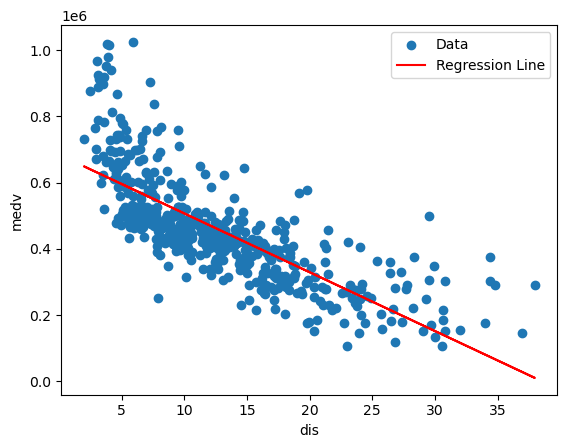

In [20]:


# Plot data
plt.scatter(dis, medv, label='Data')
plt.xlabel('dis')
plt.ylabel('medv')

# Fit a linear regression model
lm = LinearRegression()
lm.fit(dis, medv)

# Plot the regression line
plt.plot(dis, lm.predict(dis), color='red', label='Regression Line')

# Add labels and legend
plt.xlabel('dis')
plt.ylabel('medv')
plt.legend()

# Show the plot
plt.show()

Consider the variables plotted above. In the context of the `Boston` dataset:

_(iii)_ What is the (implied) null hypothesis? What is the (implied) alternative hypothesis?

_(iv)_ Now, let’s fit a simple regression model, using the general syntax `sm.OLS()` and `model.fit()`. As above, use `medv` as the response variable Y, and `dis` as the predictor variable X. (Hint: use the syntax `sm.add_constant` with the appropriate argument).

In [21]:
import statsmodels.api as sm

# Add a constant (intercept) to the predictor variable 'dis'
X = sm.add_constant(dis)  # Adds an intercept (β₀) term to the model
Y = medv

# Fit the OLS regression model
model = sm.OLS(Y, X)       # Ordinary Least Squares (OLS) regression
results = model.fit()      # Fit the model

# Print the summary of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     668.7
Date:                Tue, 24 Sep 2024   Prob (F-statistic):           1.93e-93
Time:                        21:08:31   Log-Likelihood:                -6357.8
No. Observations:                 489   AIC:                         1.272e+04
Df Residuals:                     487   BIC:                         1.273e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.841e+05   1.01e+04     67.551      0.0

Review your model output to answer the following questions (Hint: use the `summary` and `conf_int` functions):    
_(v)_ What are the _coefficient estimates_ for $B_0$ (intercept) and $B_1$ (slope)?  
_(vi)_ What are the _standard errors_ for $B_0$ and $B_1$?  
_(vii)_ What are the _confidence intervals_ for $B_0$ and $B_1$?  


In [22]:
# ANS (V)  the coefficient estimates
intercept, slope = results.params
print(f"Intercept (B₀): {intercept}")
print(f"Slope (B₁): {slope}")

Intercept (B₀): 684138.4930684498
Slope (B₁): -17759.04832737075


In [23]:
# ANS (VI)  the standard errors
std_err_intercept, std_err_slope = results.bse
print(f"Standard Error of B₀: {std_err_intercept}")
print(f"Standard Error of B₁: {std_err_slope}")


Standard Error of B₀: 10127.730392636535
Standard Error of B₁: 686.7463997310351


In [24]:
# ANS (VII)  the confidence intervals for B₀ and B₁
conf_int = results.conf_int()
print(f"Confidence Interval for B₀ (Intercept): {conf_int[0]}")
print(f"Confidence Interval for B₁ (Slope): {conf_int[1]}")
# Summary of the model
print(results.summary())

Confidence Interval for B₀ (Intercept): [664239.05136698 704037.93476991]
Confidence Interval for B₁ (Slope): [-19108.39999999 -16409.69665475]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     668.7
Date:                Tue, 24 Sep 2024   Prob (F-statistic):           1.93e-93
Time:                        21:14:04   Log-Likelihood:                -6357.8
No. Observations:                 489   AIC:                         1.272e+04
Df Residuals:                     487   BIC:                         1.273e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025


Now, let's interpret the model output.  
_(viii)_ Is the model a good fit? (Hint: review $R^2$)  
_(ix)_ Do we reject the (implied) null hypothesis? Why or why not? (Hint: review model $F$ statistic, $p$ value).  

In [25]:
# ANS (VIII) The R-squared value
r_squared = results.rsquared
print(f"R-squared: {r_squared}")


R-squared: 0.5786189401388357


In [26]:
# ANS (IX) The F-statistic and its associated p-value
f_statistic = results.fvalue
p_value = results.f_pvalue
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")


F-statistic: 668.723515813586
P-value: 1.925205638269376e-93


### Question 2: Multiple Linear Regression 

We'll continue to use the `Boston` dataset for this question.

_(i)_ Fit a multiple linear regression, with two predictor variables: $X_1$ is `dis`, and $X_2$ is `rm`. As before, keep `medv` as the response variable Y. (Hint: use the syntax `sm.add_constant` with the appropriate arguments).

_(ii)_ In the context of the `Boston` dataset, state the null and alternative hypotheses.

_(iii)_ Review the model output, using `summary()`. Does it appear that both `dis` and `rm` are predictive of `medv`? How did you determine this?

_(iv)_ We can use the inbuilt `sm.graphics.plot_regress_exog` function to generate helpful diagnostic plots (Hint: provide `plot_regress_exog` with the multiple regression model). Review the first generated plot, 'Residuals vs. Fitted'. Which observations are outliers? What impact might outliers have on our model?

In [28]:
import statsmodels.api as sm

# Extract the predictor variables (X1 = dis, X2 = rm) and the response variable (Y = medv)
X1 = data['LSTAT'].values.reshape(-1, 1)
X2 = data['RM'].values.reshape(-1, 1)
Y = data['MEDV'].values.reshape(-1, 1)

# Combine X1 and X2 into a single predictor matrix
X = np.concatenate([X1, X2], axis=1)

# Add a constant (intercept) to the predictor matrix
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(Y, X)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     481.1
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          5.85e-116
Time:                        21:21:21   Log-Likelihood:                -6302.1
No. Observations:                 489   AIC:                         1.261e+04
Df Residuals:                     486   BIC:                         1.262e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.19e+04   6.01e+04      0.364      0.7

_(v)_ Fit a second model, this time including an interaction between the two predictor variables. Is there an interaction? (Hint: add a variable `x1 * x2` where `x1` and `x2` are the predictor variables). State an interpretation of the interaction, in the context of the `Boston` dataset, in one or two sentences.

In [29]:
# Create the interaction term (dis * rm)
interaction = X1 * X2

# Combine X1, X2, and the interaction term into a single predictor matrix
X_interaction = np.concatenate([X1, X2, interaction], axis=1)

# Add a constant (intercept) to the predictor matrix
X_interaction = sm.add_constant(X_interaction)

# Fit the multiple linear regression model with interaction
model_interaction = sm.OLS(Y, X_interaction)
results_interaction = model_interaction.fit()

# Print the summary of the regression results
print(results_interaction.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     567.4
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          3.66e-158
Time:                        21:22:41   Log-Likelihood:                -6200.8
No. Observations:                 489   AIC:                         1.241e+04
Df Residuals:                     485   BIC:                         1.243e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.218e+05   6.37e+04     -9.764      0.0

# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Simple Linear Regression - Standard errors for $B_0$ and $B_1$|The standard errors are correct.|The standard errors are not correct.|
|Simple Linear Regression - Confidence intervals for $B_0$ and $B_1$|The confidence intervals are correct.|The confidence intervals are not correct.|
|Multiple Linear Regression - Null and alternative hypotheses|The relationship for both hypotheses has been correctly identified.|The relationship for both hypotheses has been incorrectly identified.|
|Multiple Linear Regression - Interpretation of the interaction|The interaction has been correctly identified.|The interaction has been incorrectly identified.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applying_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
